In [1]:
from qiskit import *
import numpy as np
%matplotlib inline
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit import IBMQ

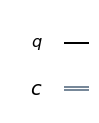

In [2]:
#How do we represent these things as circuits?
#Read left to right in time
#Qiskit initializes every qubit into |0>
circuit = QuantumCircuit(1,1) #Create a quantum circuit of 1 qubit and 1 classical circuit for measurement
circuit.draw(output = 'mpl')  #The output command just makes the circuit drawing look nicer,

[1.+0.j 0.+0.j]


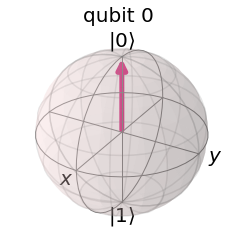

In [3]:
simulator = Aer.get_backend('statevector_simulator') #aer is one of Qiskit's builtin simulators, we're calling the statevector simulator
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

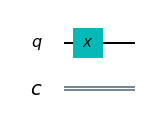

In [4]:
#In order to get to the |1> state, we need to perform a single qubit gate
#Single qubit gates act on single qubits in a similar way to classical NOT gates
#The analog for the NOT gate is the X gate
circuit = QuantumCircuit(1,1)
circuit.x(0)
circuit.draw(output = 'mpl')

[0.+0.j 1.+0.j]


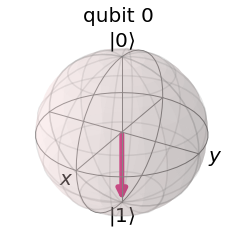

In [5]:
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(statevector)

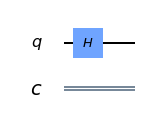

In [6]:
#The X gate is how we get between |0> and |1> states, but what about the superposition states that make quantum computing different from classical?
#Let's introduce the Hadamard gate, which brings a 50:50 superposition of the base states
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.draw(output = 'mpl')


[0.70710678+0.j 0.70710678+0.j]


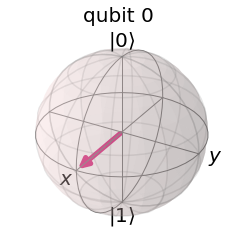

In [7]:
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

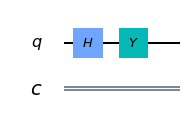

In [8]:
#We get a resulting vector that is halfway between the base states
#We can also rotate around the sphere by using a y gate
circuit.y(0)
circuit.draw(output = 'mpl')

[0.-0.70710678j 0.+0.70710678j]


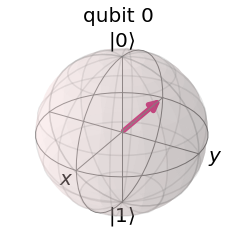

In [9]:
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

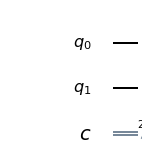

In [10]:
#So we can take advantage of the entire sphere of possible values through a combination of single qubit gates
#What does it look like when 2 qubits talk to each other?
#2-qubit gates:
circuit = QuantumCircuit(2,2)
circuit.draw(output='mpl')

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


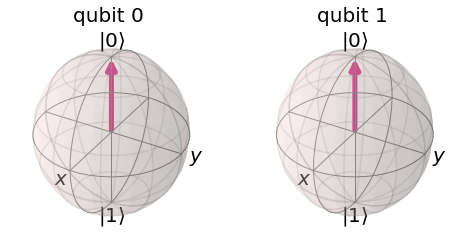

In [11]:
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

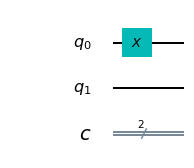

In [12]:
#Let's start with the CNOT gate
#CNOT flips the value of the target qubit if the value of the control qubit is |1>
circuit.x(0)
circuit.draw(output = 'mpl')

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


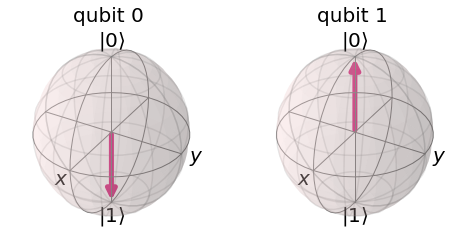

In [13]:
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

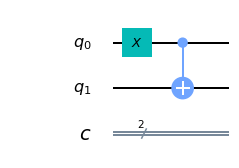

In [14]:
circuit.cx(0,1)
circuit.draw(output = 'mpl')

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


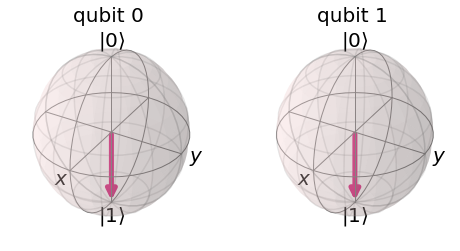

In [15]:
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
plot_bloch_multivector(statevector)

In [16]:
circuit = QuantumCircuit(2,2)

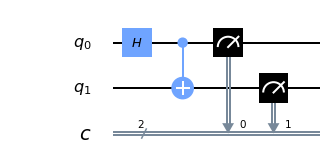

In [17]:
#We can get qubits to talk to each other, now we can implement entanglement across the qubits
circuit.h(0)
circuit.cx(0, 1)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw(output = 'mpl')

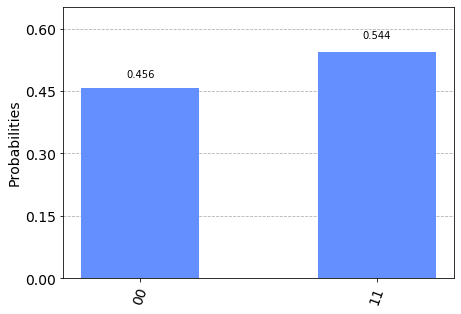

In [18]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=backend, shots = 1000).result()
counts = result.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
provider = IBMQ.get_provider('ibm-q')
##check the https://quantum-computing.ibm.com/ website to see which >2 qubit device has the shortest queue, 
##I've put the melbourne server here as that's what the video says, but you should change this
qcomp = provider.get_backend('ibmq_burlington')
job = execute(circuit, backend=qcomp) #this sends our circuit to the queue

In [ ]:
from qiskit.tools.monitor import job_monitor
job_monitor(job) #this cell will tell us when the circuit finishes running

In [ ]:
result = job.result()
plot_histogram(result.get_counts(circuit)) #plot the results here
#the appearance of the 10 and 01 states in these results is due to noise on a real-world system